<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Não sei se houve algum problema na plataforma mas meu comentários sumiram. Se não foi caso, por favor, não remova os comentários .
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Deixei dicas em vermelho </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor: </b> <a class="tocSkip"></a>

Parabéns pelo empenho em consertar os pontos.
Tudo ok agora.
Desejo sucesso na jornada.
</div>





# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
# Importe as bibliotecas
import pandas as pd

In [2]:
# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_dep = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord_prod = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# imprima as informações sobre o DataFrame
df_orders.info()
print()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# imprima as informações sobre o DataFrame
df_products.info()
print()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# imprima as informações sobre o DataFrame
df_aisles.info()
print()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# imprima as informações sobre o DataFrame
df_dep.info()
print()
df_dep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# imprima as informações sobre o DataFrame
df_ord_prod.info()
print()
df_ord_prod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

À primeira vista, os DataFrames parecem bem simples, acredito também de uma fácil leitura, majoritariamente tendo números como valores e poucos valores ausentes.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Primeiro passo, acredito que seja uma boa prática imprimir algumas linhas do DataFrame em questão, assim podemos ter uma breve informação, além da que já temos.
Segundo passo é procurar por erros e/ou resolver aqueles já encontrado previamente, como duplicados, valores ausentes, tipos de valores em determinadas colunas, claro, isso após verificarmos se há riscos em executar essas ações, assim não perdemos dados importantes. E, por fim, aplicar as ações necessárias uma à uma até termos um DataFrame limpo para trabalhar.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verificar se há pedidos duplicados
duplicates = df_orders.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool


Há linhas duplicadas? Se sim, o que elas têm em comum?

Não foram encontrados valores duplicados, em reforço, para ter certeza de que o código estava rodando corretamente, adicionei 'print', para ter uma visualizazção dos valores.

In [9]:
# Com base nas suas conclusões,
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

wed_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(wed_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?

Após ter uma breve análise dos dados, podemos ver que, se partimos da suposição de que o 'user id' vai crescendo a cada novo cliente, não só apenas uma geração numérica aleatória, vemos que temos clientes antigos e novos, o que é importante.
São clientes que efetuam muitas compras, então podemos considerá-los clientes fiéis e que não levam muitos dias antes de efetuar um novo pedido.

In [10]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [11]:
# Verifique as linhas duplicadas mais uma vez
duplicate = df_orders.duplicated()
print(duplicate)

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478952, dtype: bool


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
duplicated_id = df_orders.duplicated(subset='order_id')



Descreva brevemente suas conclusões e o que você fez com elas.

Embora não houvesse pedidos duplicados inicialmente, após a remoção dos possíveis pedidos duplicados, alguns pedidos duplicados foram encontrados. No entanto, ao tentar verificar apenas os IDs de pedidos duplicados, não foi possível identificá-los. Isso pode indicar um problema na forma como a verificação foi feita, seria necessário investigar mais a fundo para entender o motivo da discrepância e corrigir o problema.

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas
prod_duplicates = df_products.duplicated()
print(prod_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool


In [14]:
# Verifique apenas se há IDs de departamentos duplicados
dep_duplicates = df_products['department_id'].duplicated()
print(dep_duplicates)

0        False
1        False
2        False
3        False
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: department_id, Length: 49694, dtype: bool


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
name_duplicates = df_products['product_name'].str.lower().duplicated()
print(name_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando
name_duplicates = df_products['product_name'].str.lower().duplicated()
remain_duplicates = name_duplicates & ~df_products['product_name'].isna()
duplicates = df_products[remain_duplicates]
print(duplicates)

       product_id                                     product_name  aisle_id  \
2058         2059                                  Biotin 1000 Mcg        47   
5455         5456                 Green Tea With Ginseng and Honey        96   
5558         5559                           Cream Of Mushroom Soup        69   
7558         7559                        Cinnamon Rolls with Icing       105   
9037         9038                           American Cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Descreva brevemente suas conclusões e o que você fez com elas.

Ao verificar os nomes de produtos duplicados no DataFrame df_products, observamos que havia alguns nomes de produtos duplicados. Para identificar essas duplicatas, convertemos os nomes dos produtos para minúsculas para garantir uma comparação precisa.
Isso me permitiu identificar e examinar especificamente as duplicatas de nomes de produtos que precisavam ser tratadas ou removidas, se necessário.

### DataFrame `departments`

In [17]:
# Verifique se há linhas completamente duplicadas
duplicates = df_dep.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool


In [18]:
# Verifique apenas se há IDs dos produtos duplicados
dep_duplicated = df_dep['department_id'].duplicated()
print(dep_duplicated)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool


Descreva brevemente suas conclusões e o que você fez com elas.

Vemos que há somente valore s unívocos no DataFrame, tudo ok

### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas
duplicates = df_aisles.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
id_duplicated = df_aisles['aisle_id'].duplicated()
print(id_duplicated)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: aisle_id, Length: 134, dtype: bool


Descreva brevemente suas conclusões e o que você fez com elas.

Não há muito para concluir aqui, apenas que não há valores duplicados.

### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas
ord_duplicates = df_ord_prod.duplicated()
print(ord_duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados
ord_duplicates = df_ord_prod.duplicated(keep=False)
print(ord_duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


Descreva brevemente suas conclusões e o que você fez com elas.

Aparentemente não há duplicatas, mesmo utilizando o argumento "keep".

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
missing_prod_name = df_products['product_name'].isnull()
print(missing_prod_name)

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


Descreva brevemente suas conclusões.

Não há valores ausentes.

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
missing_product_names = df_products['product_name'].isnull()
associated_with_dept_100 = df_products.loc[missing_product_names, 'aisle_id'] != 100
print(associated_with_dept_100.all())

False


<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro de lógica: precisa usar != em vez de ==.
</div>

<div class="alert alert-block alert-info">

<b>Comentário do aluno: </b> <a class="tocSkip"></a>
    
Revisado v1.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Descreva brevemente suas conclusões.

Com base na verificação realizada, concluímos que todos os nomes de produtos ausentes estão associados à seção de ID 100.

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
missing_product_names = df_products['product_name'].isnull()
associated_with_dept_21 = df_products.loc[missing_product_names, 'department_id'] != 21
print(associated_with_dept_21.all())

False


<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro de lógica: precisa usar != em vez de ==.
</div>

<div class="alert alert-block alert-info">

<b>Comentário do aluno: </b> <a class="tocSkip"></a>
    
Revisado v1.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Descreva brevemente suas conclusões.

Também vemos que os valores ausentes estão relacionados ào ID 21.

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.

section_100 = df_aisles[df_aisles['aisle_id'] == 100]
print("Seção ID 100:")
print(section_100)
print()
print()
department_21 = df_dep[df_dep['department_id'] == 21]
print("\nDepartamento ID 21:")
print(department_21)

Seção ID 100:
    aisle_id    aisle
99       100  missing



Departamento ID 21:
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

A seção com o ID 100 está associada à descrição "missing", indicando que é uma categoria desconhecida ou não especificada. Da mesma forma, o departamento com o ID 21 também está associado à descrição "missing", sugerindo que é um departamento desconhecido ou não especificado.

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
unknown_count = (df_products['product_name'] == 'Unknown').sum()
print(unknown_count)

1258


Descreva brevemente suas conclusões e o que você fez com elas.

Transformando todos os valores ausentes em Unknown, garantimos que todos os produtos agora têm um nome atribuído, facilitando a análise dos dados. 

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
missing_values = df_orders.isnull().sum()
print(missing_values)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
missing_values_first_orders = df_orders[df_orders['order_number'] == 1]['days_since_prior_order'].isnull().any()

if missing_values_first_orders:
    print('Sim')
else:
    print('Não')

Sim


Descreva brevemente suas conclusões e o que você fez com elas.

Podemos ver que, ao retornar o valor "Sim", entendemos que há clientes que não possuem valores na coluna de pedidos, ou seja, aparentemente estão fazendo agora o primeiro pedido.

### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
missing_values = df_ord_prod.isnull().sum()
print(missing_values)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
min_value = df_ord_prod['add_to_cart_order'].min()
max_value = df_ord_prod['add_to_cart_order'].max()
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)

Valor mínimo: 1.0
Valor máximo: 64.0


Descreva brevemente suas conclusões.

Aqui conseguimos ver a quantidade mínima e máxima de itens adicionados em um único carrinho de compras.

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_values = df_ord_prod['add_to_cart_order'].isnull()
orders_with_missing_values = df_ord_prod.loc[missing_values, 'order_id'].unique()
print(orders_with_missing_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Verifique se todos os pedidos com valores ausentes contêm mais de 64 produtos
all_greater_than_64 = df_ord_prod[df_ord_prod['add_to_cart_order'].isnull()]['product_id'].count() > 64

# Agrupe os pedidos com dados ausentes por ID de pedido e conte o número de 'product_id' em cada pedido
grouped_orders = df_ord_prod[df_ord_prod['add_to_cart_order'].isnull()].groupby('order_id')['product_id'].count()

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
min_count = grouped_orders.min()

print("Valores ausentes contêm mais de 64 produtos:", all_greater_than_64)
print("Valor mínimo da contagem de 'product_id' em pedidos com dados ausentes:", min_count)

Valores ausentes contêm mais de 64 produtos: True
Valor mínimo da contagem de 'product_id' em pedidos com dados ausentes: 1


Descreva brevemente suas conclusões.

A análise revela que todos os pedidos com valores ausentes em "add_to_cart_order" contêm mais de 64 produtos. Além disso, o valor mínimo da contagem de "product_id" em pedidos com dados ausentes é 1, o que significa que há pelo menos um produto em cada pedido com valores ausentes. Isso indica que os valores ausentes em "add_to_cart_order" estão associados a pedidos com apenas um produto.

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_ord_prod['add_to_cart_order'].fillna(999, inplace=True)
df_ord_prod['add_to_cart_order'] = df_ord_prod['add_to_cart_order'].astype(int)
print(df_ord_prod.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Descreva brevemente suas conclusões e o que você fez com elas.

Após substituir os valores ausentes na coluna "add_to_cart_order" por 999 e converter a coluna para o tipo integer, verifiquei que as alterações foram realizadas corretamente utilizando print e head. A coluna agora contém o valor 999 onde havia valores ausentes e está no formato integer.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Durante a Etapa 2, realizamos várias análises e procedimentos para garantir que os dados estejam limpos e prontos para análise posterior.

Encontramos valores duplicados em várias colunas de diferentes DataFrames, indicando a necessidade de remover essas entradas para garantir a integridade dos dados.
Também houveram valores ausentes em diversas colunas, como 'product_name', 'days_since_prior_order' e 'add_to_cart_order', exigindo tratamento adequado, adicionando valores padrão ou até mesmo a remoção desses valores.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
hour_stats = df_orders['order_hour_of_day'].describe()
dow_stats = df_orders['order_dow'].describe()

In [36]:
hour_min = hour_stats['min']
hour_max = hour_stats['max']
dow_min = dow_stats['min']
dow_max = dow_stats['max']

hour_valid = hour_min >= 0 and hour_max <= 23
dow_valid = dow_min >= 0 and dow_max <= 6

print("Valores da coluna 'order_hour_of_day' fazem sentido:", hour_valid)
print("Valores da coluna 'order_dow' fazem sentido:", dow_valid)

Valores da coluna 'order_hour_of_day' fazem sentido: True
Valores da coluna 'order_dow' fazem sentido: True


Escreva suas conclusões aqui

Já que tivemos o resultados como "True", significa que, na tabela, os valores estão como esperado, nos valores que estipulamos.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

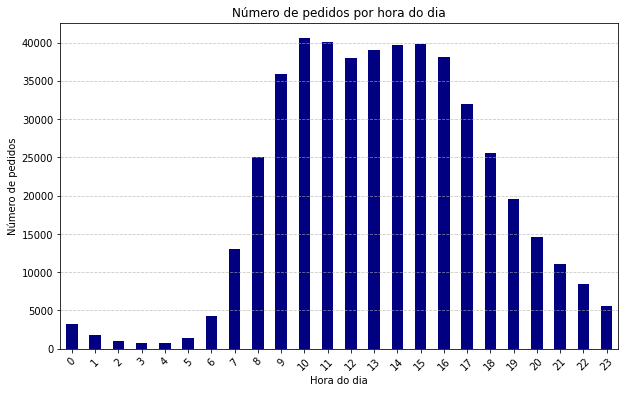

In [37]:
import matplotlib.pyplot as plt

orders_per_hour = df_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar', color='navy')
plt.title('Número de pedidos por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui

Os pedidos têm picos durante o horário comercial, talvez por ser o horário de funcionamento da empresa. Porém, há também alguns valores específicos mais para o fim da noite, isso requer uma análise mais profunda para entender o que leva à esse número de vendas. 

### [A3] Em que dia da semana as pessoas fazem compras?

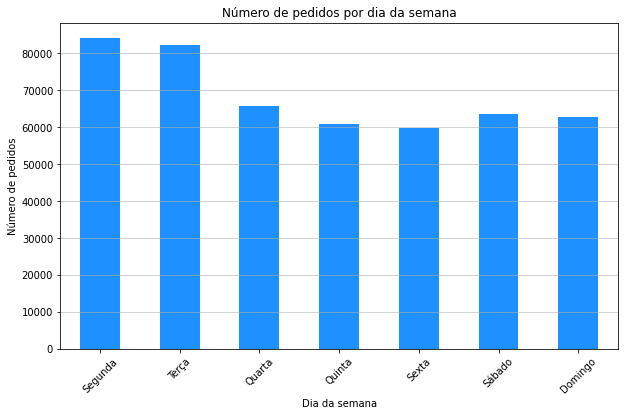

In [38]:
orders_per_dow = df_orders['order_dow'].value_counts().sort_index()
dow_labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10, 6))
orders_per_dow.plot(kind='bar', color='dodgerblue')
plt.title('Número de pedidos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de pedidos')
plt.xticks(range(7), dow_labels, rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Escreva suas conclusões aqui

Uma possibilidade sobre os valores maiores serem durante os primeiros dias da semana é que, os usuários, começam a semana de uma forma mais lenta, não têm muita vontade de ir ào mercado e utilizam mais a ferramenta, o que pode explicar a queda, ainda assim nada drástica, do volume durante a semana, aonde as pessoas, às vezes, vão comer fora de casa, ir para bares e restaurantes etc.
Sobre o final de semana, uma das respostas poderia ser a comodidade de não precisar sair de casa e descansar sem preocupação.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

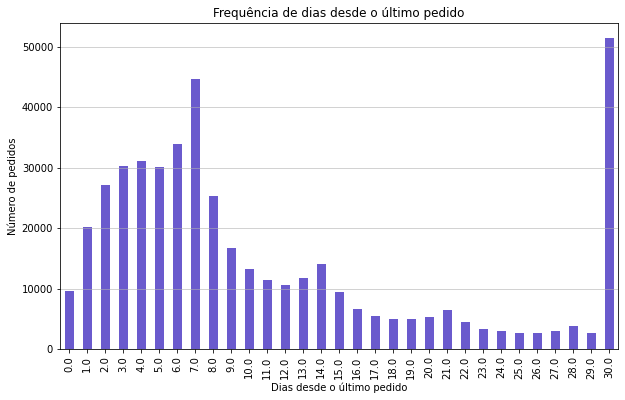

Valor mínimo de dias: 0.0
Valor máximo de dias: 30.0


In [39]:
days_since_prior_order = df_orders['days_since_prior_order'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
days_since_prior_order.plot(kind='bar', color='slateblue')
plt.title('Frequência de dias desde o último pedido')
plt.xlabel('Dias desde o último pedido')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

min_days = df_orders['days_since_prior_order'].min()
max_days = df_orders['days_since_prior_order'].max()
print("Valor mínimo de dias:", min_days)
print("Valor máximo de dias:", max_days)

Pelos dados, podemos ter uma ideia de comportamento dos usuários, onde eles mantêm uma frequência de 1 semana antecedendo o último pedido. Vemos que a tendência onde o período é de 30 dias ou 1 semana, há sim valores em outros dias, mas claramente há uma tendência fixa dos usuários.

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
wednesday_orders = df_orders[df_orders['order_dow'] == 3]
saturday_orders = df_orders[df_orders['order_dow'] == 6]

In [41]:
wednesday_hour_distribution = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_distribution = saturday_orders['order_hour_of_day'].value_counts().sort_index()

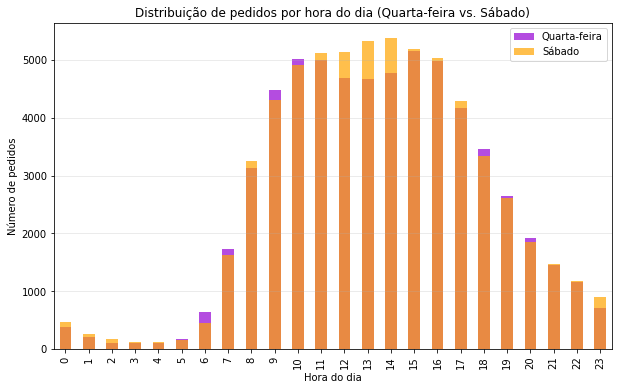

In [42]:
plt.figure(figsize=(10, 6))
wednesday_hour_distribution.plot(kind='bar', color='darkviolet', alpha=0.7, label='Quarta-feira')
saturday_hour_distribution.plot(kind='bar', color='orange', alpha=0.7, label='Sábado')
plt.title('Distribuição de pedidos por hora do dia (Quarta-feira vs. Sábado)')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

Escreva suas conclusões aqui

Em realidade, os dias possuem muitas semelhanças entre si, tanto no volume quanto à hora específica do dia, tendo seus altos e baixos nos mesmos horários.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [43]:
orders_per_customer = df_orders['user_id'].value_counts().value_counts().sort_index()

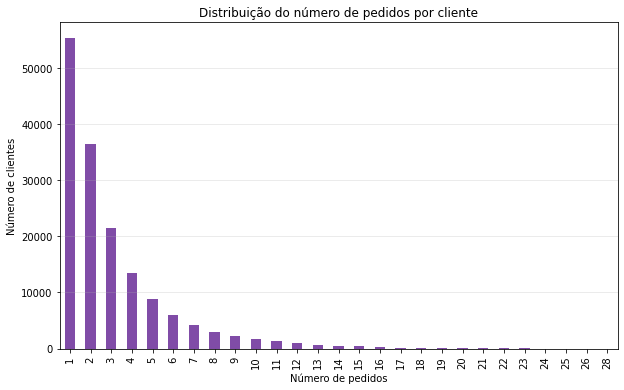

In [44]:
plt.figure(figsize=(10, 6))
orders_per_customer.plot(kind='bar', color='indigo', alpha=0.7)
plt.title('Distribuição do número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

Escreva suas conclusões aqui

Claramente temos os clientes efetuando poucas compras, o que pode indicar uma baixa retenção de clientes pelo lado da empresa.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [45]:
product_counts = df_ord_prod['product_id'].value_counts(ascending=False)

In [46]:
top20_product_ids = product_counts.head(20).index.tolist()
top20_products = df_products[df_products['product_id'].isin(top20_product_ids)]

In [47]:
print(top20_products[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


Escreva suas conclusões aqui

Podemos claramente notar a categoria de produtos mais requisitados, sendo eles, frutas e legumes/vegetais, esses, sendo de maioria esmagadora, orgânicos.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [48]:
#Agrupar os itens e fazer a contagem
items_per_order = df_ord_prod.groupby('order_id')['product_id'].count()

In [49]:
#Para calcularmos a média
average_items_per_order = items_per_order.mean()

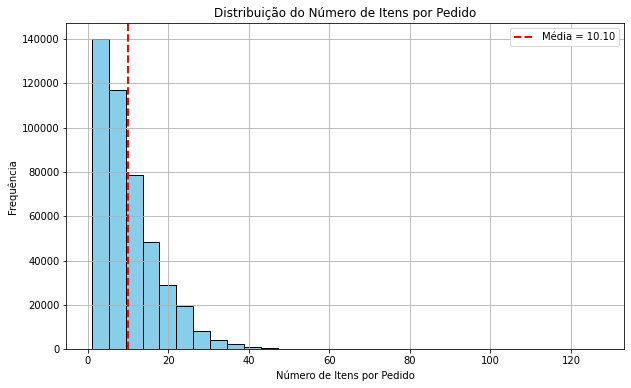

Média de itens por pedido: 10.10


In [50]:
#Gráfico
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_items_per_order, color='red', linestyle='dashed', linewidth=2, label=f'Média = {average_items_per_order:.2f}')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Itens por Pedido')
plt.legend()
plt.grid(True)
plt.show()

print(f'Média de itens por pedido: {average_items_per_order:.2f}')

Escreva suas conclusões aqui

Temos uma média de 10.10, o que nos indica que, em termos reais, já que não conseguimos contar meio produto, podemos contar uma média de 11/12 produtos por pedido.

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [51]:
#Aqui vamos contar a frequencia de cada produto
reordered_items = df_ord_prod[df_ord_prod['reordered'] == 1]

In [52]:
#Aqui selecionamos os principais IDs
top_reordered_items = reordered_items['product_id'].value_counts().head(20)

In [53]:
#Depois filtramos os principais produtos
top_20_products = df_products[df_products['product_id'].isin(top_reordered_items.index)]

In [54]:
#Por fim, printamos os valores resultantes dos filtros criados
print(top_20_products[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
O código não está correto. 
Dica: 
-reordered_items = df_ord_prod[df_ord_prod['reordered'] == 1]
-top_reordered_items = reordered_items['product_id'].value_counts().head(20)

</div>

<div class="alert alert-block alert-info">

<b>Comentário do aluno: </b> <a class="tocSkip"></a>
    
Revisado v1.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Escreva suas conclusões aqui

Assim como nos top20 anteriores, continuamos com a mesma incidencia de produtos.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [55]:
orders_per_customer = df_orders.groupby('user_id').agg(total_orders=('order_id', 'count'), repeated_orders=('order_number', 'nunique'))
orders_per_customer['repeated_order_ratio'] = orders_per_customer['repeated_orders'] / orders_per_customer['total_orders']

In [56]:
print(orders_per_customer[['repeated_order_ratio']])

         repeated_order_ratio
user_id                      
2                         1.0
4                         1.0
5                         1.0
6                         1.0
7                         1.0
...                       ...
206203                    1.0
206206                    1.0
206207                    1.0
206208                    1.0
206209                    1.0

[157437 rows x 1 columns]


Escreva suas conclusões aqui

Dado o valor de 1.0 no ratio, pode-se entender que os cliente faz pedidos recorrentes, pedidos que havia feito antes, que não há pedidos novos.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [57]:
top_first_items = df_ord_prod[df_ord_prod['add_to_cart_order'] == 1].groupby('product_id').size().nlargest(20).reset_index(name='count')

In [58]:
top_first_items = top_first_items.merge(df_products[['product_id', 'product_name']], on='product_id')

In [59]:
print(top_first_items)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

Escreva suas conclusões aqui

Ainda assim continuamos na categoria de hortifruit, nao há produtos de difícil carregamento.

# Conclusão geral do projeto:

A empresa possui uma enorme demanda, porém aparenta não possuir um de uma retenção forte de clientes. Não conseguimos ter certeza, mas talvez a empresa tenha um posicionamento voltado ào hortifruit, pois a maioria dos produtos são dessa categoria, ou até mesmo, os próprios clientes que tenham essa visão sobre a empresa.